<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/5PageRank/PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page Rank

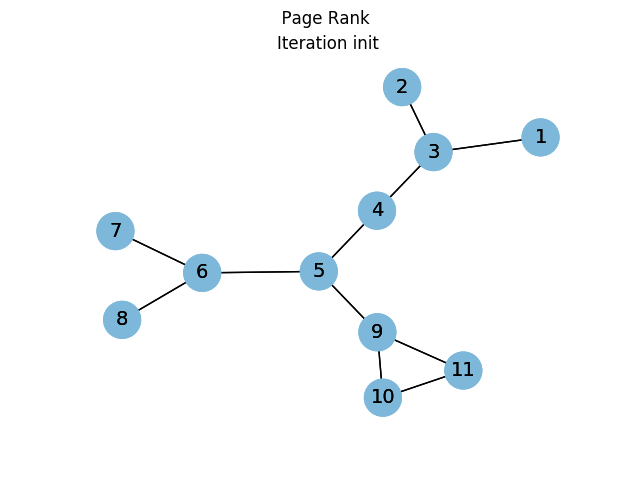

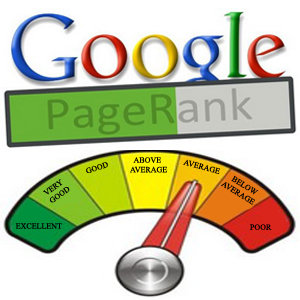

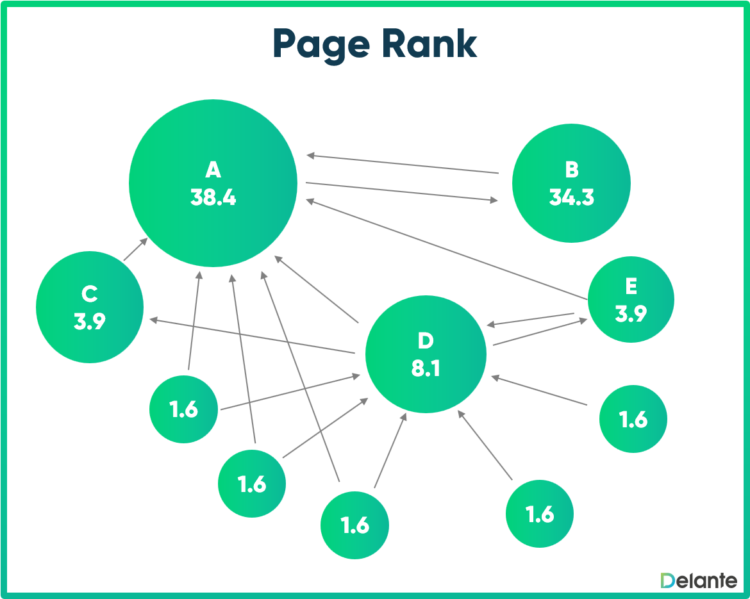

**PageRank Equation**

$${PR}({P}_{i})=\frac{\mathbf{1}-{d}}{{N}}+{d}\times\sum_{{P}_{j}\in{M}({P}{i})}\frac{{PR}({P}_{j})}{{L}{({P}}_{j})}$$

# **Sample graphs**

**Graph 1**

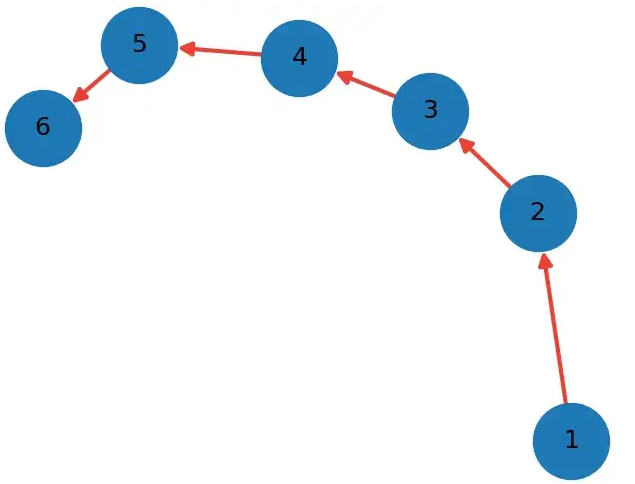

**Graph 2**

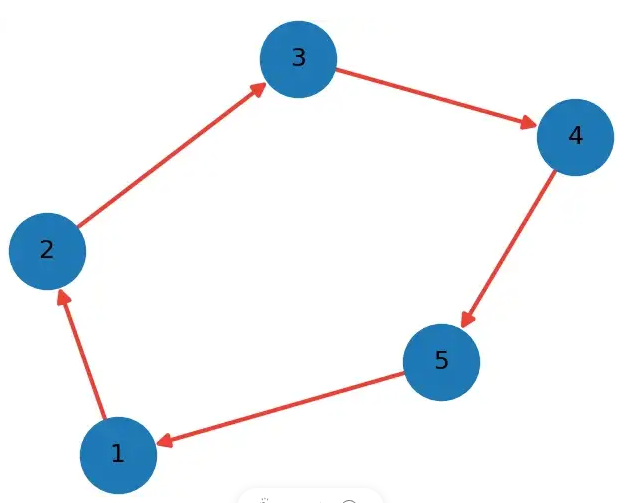

**Graph 3**

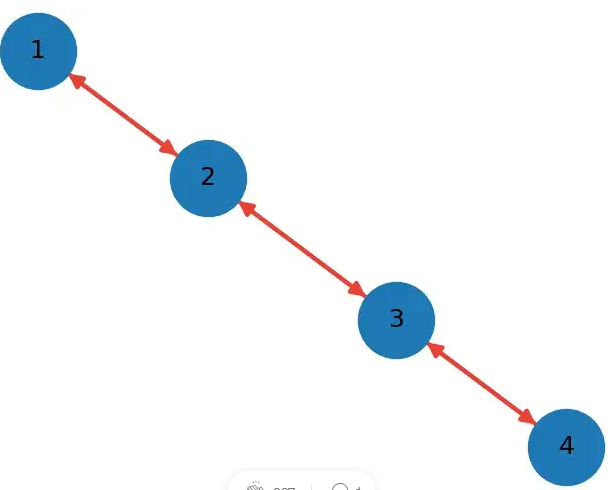

**Graph 4**
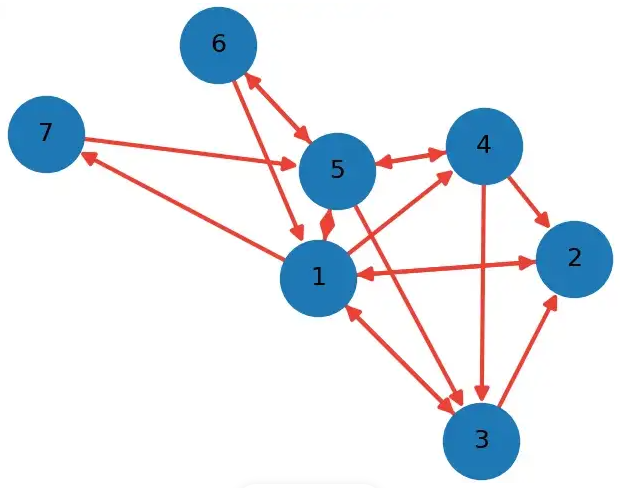

In [1]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

#number of steps
all_steps = 10000
#probability of teleporting
teleport_prob = 0.1 

In [3]:
#this method removes all zero from main matrix and returns a list that stored links only
#this makes faster run our app

def process_graph(graph):
  processed_graph =[]
  n_nodes = len(graph)
  for i in range(n_nodes):
    #generate empty vector to store linked nodes from node i
    processed_graph.append([])
    for j in range(n_nodes):
      #If node i has link to node j, store j in linked nodes list
      if graph[i][j]==1:
        processed_graph[-1].append(j)#adds node to end of list

  return processed_graph

In [4]:
#take one step from current position and return the new position
def one_step_processed_graph(processed_graph,n_nodes,current_position):
  
  if len(processed_graph[current_position])== 0 :# have a deadend and must be teleport
    return np.random.randint(n_nodes)
  
  #The user can jump to one of the pages or use the links
  if np.random.rand()< teleport_prob:#The user can jump to one of the pages(Ability to jump to a page)
    return np.random.randint(n_nodes)
  else:
    n_links = len(processed_graph[current_position]) #The number of links available at the current location
    target_pos = np.random.randint(n_links)  #select target page randomly
    return processed_graph[current_position][target_pos]
  

In [5]:
def calculate_pagerank(processed_graph):

  n_nodes = len(processed_graph)

  #We are going to simulate a random walker (visit web sit)
  #Choose the starting point randomly
  #returns a number in range 0 - (n-1)
  curr_pos = np.random.randint(n_nodes)
  #A vector to save ranking
  pagerank =[0]*n_nodes
  for i in range(all_steps):
    curr_pos = one_step_processed_graph(processed_graph,n_nodes,curr_pos)
    pagerank[curr_pos]+=1
  
  return pagerank

In [6]:
def RunMainMethod(graph):
  #the number of nodes
  n_nodes = len(graph)

  #Make graph like a sparse matrix
  processed_graph = process_graph(graph)

  visited_count = calculate_pagerank(processed_graph)

  return visited_count


**SIMULATE TRANSITION MATRIX**

In [7]:
#How probability is it to go from A to B?
def prob(a,b,processed_graph):
  n = len(processed_graph)
  if processed_graph[a]==0 : #a is deadend,
    #prob(teleport)=1 and prob(b) =1/n
    return (1/n)*1
  else:
    if b in processed_graph[a]:#b has a link from a
    #we can go to b throw teleport or edge of a --> b
      return teleport_prob* 1/n + (1-teleport_prob)*(1/len(processed_graph[a]))
    else:
      #prob(teleport)=teleport_prob and prob(b)=1/n
      return teleport_prob* 1/n

#generate sample transition matrix
def generate_transition_matrix(processed_graph):
  
  n_nodes = len(processed_graph)

  #create matrix NxN by zero values
  p = np.zeros((n_nodes,n_nodes))
  #generating Transiting matrix on nodes
  for i in range(n_nodes):
    for j in range(n_nodes):
      p[i][j] = prob(i,j,processed_graph)
  return p

# **Graph data**

In [8]:
graph0 = [[0, 1, 1],[1, 0, 1], [0, 0 ,0]]
graph1 = [[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[0,0,0,0,0,0]]
graph2 = [[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[1,0,0,0,0]]
graph3 = [[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]]
graph4 = [[0,1,1,1,1,0,1],[1,0,0,0,0,0,0],[1,1,0,0,0,0,0],[0,1,1,0,1,0,0],[1,0,1,1,0,1,0],[1,0,0,0,1,0,0],[0,0,0,0,1,0,0]]

# **Test For random walk**

In [9]:
visited_count = RunMainMethod(graph1)

ranking = np.array(visited_count)/all_steps
randow_walk_rank = ranking
#Visited
print("Visited")
print(visited_count)
print("Page rank")
print(ranking)


Visited
[559, 1082, 1543, 1937, 2290, 2589]
Page rank
[0.0559 0.1082 0.1543 0.1937 0.229  0.2589]


# **Test Code for Eigenvalue**

In [10]:

#Make graph like a sparse matrix
processed_graph = process_graph(graph1)

P = generate_transition_matrix(processed_graph)

eig_values, eig_vectors = eig(P,left=True,right=False)

#Index of max eigen value
idx = np.argmax(eig_values)

#normalized eigen vectors
fast_rank = eig_vectors[:,idx]/np.sum(eig_vectors[:,idx])

fast_rank

array([0.02527231-0.j, 0.05976156-0.j, 0.1068292 -0.j, 0.17106265-0.j,
       0.25872234-0.j, 0.37835194-0.j])

# **Comparison**

/usr/local/lib/python3.8/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


<BarContainer object of 6 artists>

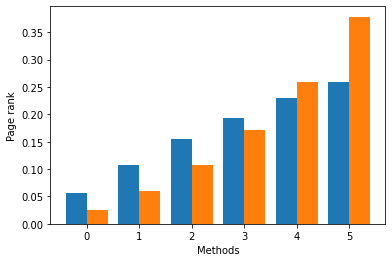

In [11]:

data = {'Random-Walk': randow_walk_rank,'Eigenvalue': fast_rank,'X':[1,2,3,4,5,6]}

df = pd.DataFrame(data)

x_axis = np.arange(len(df['Random-Walk']))
plt.xlabel('Methods')
plt.ylabel('Page rank')

plt.bar(x_axis -0.2, df['Random-Walk'], width=0.4,label = 'Random-Walk')
plt.bar(x_axis +0.2, df['Eigenvalue'], width=0.4, label = 'Eigenvalue')
